This analysis is to perform explanatory analysis on the sales data of an e-commerce company. The analysis have three objectives:
1. Review and clean the sales data for analysis
2. Draw conclusions about sales performance of various products and regions
3. Provide recommendation to the business and come up with the sales strategy

Below is an executive summary on the findings:

Conclusions from the analysis:
From product perspective, the 50 products in the sales data are categorized into "Low", "Medium" and "High" based on their average unit price. It is noticed that the "High" price products contribute most of the sales to the company.  The monthly sales are volatile for all the three categories based on the data from Jan 2022 to Sep 2024. Please refer to Figure 1 in below anlysis for details.  

From region perspective, Region 8 and Region 9 outperform others while Region 3 and Region 7 contribute the least sales in 2023. Both the top performed regions have relatively high proportion of sales from "High" price products. There is a strong rebound in sales in Region 1 in 2024 which is also driven by "High" price products. Please refer to Figure 2 & 3 in below analysis for details.

Recommendations:
We recommend the below business strategy based on the above conclusions:
1. Focus on selling the products under "High" price range;
2. Deep dive on the reason of high monthly volatilty on the sales data across region / products for opportunities during low sales months.

Data cleaning method:
1. Remove the entries with missing value under "Product" and "Price" since these two are the key sales information;
2. Keep the entries with missing value under "Region" and "Unit Sold" and fill them with value "Other" and 0 respectively since these entries may be useful during the analysis;
3. Remove the entries with Price < 1 since they deviate significantly from other entries under ther same product, which indicates that this is a data quality issue;
4. Drop the outlivers based on the entries with Price > mean + 3 * StdDev by product


In [106]:
# Import the required library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [107]:
# Load the sales data for assignemnt 1
sales = pd.read_csv(r"https://raw.githubusercontent.com/chihang1224/schulich_data_science/main/Assignment_1/sales_data.csv")

In [108]:
# Review the first few rows of the data to have a sense on what they are
sales.head()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


Findings: Price and Units sold are included.

Implications / Next step: Add a Sales column to show the sales in value in order to compare across region / product. (to be completed after cleaning the data)

In [109]:
# Review the data structure
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Findings:
1. Missing value exists across product, region, price and units sold;
2. Number of missing value is around 10% of all the entries.

Implications / next steps: 
1. Remove the entries with missing value under Product and Price since these are the critical sales information
2. Set the missing value of Region as "Others" to ensure the total sales remain the same
3. Set the missing value of Units Sold as 0 for data analysis

In [110]:
# Review the summary statistics

sales.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Findings:
1. There are 50 products with sales spread across ten regions.
2. Outliers exists in price since the max value is higher than mean + 3*std
3. Minimum price is 0.2 which may be abnormal
4. Potential duplicate value as indicate by the freq of Sale Date

Implications / next steps:
1. Review the histogram and boxplot of price to identify the outlier
2. Review the entries with unit price 0.2
3. Drop the duplicate entries

In [111]:
# Review the pattern of entries with zero price
sales[sales["Price"].isna()].describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,93,100,0.0,96.000000,105
unique,40,10,NaN,NaN,100
top,Product_12,Region_3,NaN,NaN,2023-01-26
freq,5,14,NaN,NaN,2
mean,NaN,NaN,NaN,10.333333,NaN
std,NaN,NaN,NaN,3.640898,NaN
min,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,8.000000,NaN
50%,NaN,NaN,NaN,10.000000,NaN
75%,NaN,NaN,NaN,13.000000,NaN


The entries with missing Price spread across the product (40 out of 50) and all the regions. The volume represents 10% of the data only.  Hence suggest to drop the entries.

In [112]:
# Review the pattern of entries with null product information by region
Null_product = pd.DataFrame(sales[sales["Product"].isna()].groupby("Region")["Units Sold"].sum())
Null_product.columns = ["woProduct"]
Null_product["wProduct"] = sales[~sales["Product"].isna()].groupby("Region")["Units Sold"].sum()
Null_product["Missing %"] = Null_product["woProduct"] / (Null_product["woProduct"] + Null_product["wProduct"])

Null_product

,woProduct,wProduct,Missing %
Region,,,
Region_1,111.0,701.0,0.136700
Region_10,134.0,862.0,0.134538
Region_2,64.0,707.0,0.083009
Region_3,96.0,804.0,0.106667
Region_4,45.0,894.0,0.047923
Region_5,50.0,798.0,0.058962
Region_6,106.0,754.0,0.123256
Region_7,98.0,570.0,0.146707
Region_8,45.0,770.0,0.055215


The missing products ranged from 3% to 15% by region, which is not material.  Hence suggest to remove the entries with missing product value.

In [113]:
# Drop the entries with zero price and missing product
sales.drop(sales[sales["Price"].isna()].index, inplace=True)
sales.drop(sales[sales["Product"].isna()].index, inplace=True)

sales.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,854,764,854.000000,766.000000,854
unique,50,10,NaN,NaN,811
top,Product_5,Region_9,NaN,NaN,2024-02-23
freq,27,98,NaN,NaN,2
mean,NaN,NaN,107.982037,10.052219,NaN
std,NaN,NaN,126.917044,3.140274,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.462500,8.000000,NaN
50%,NaN,NaN,77.520000,10.000000,NaN
75%,NaN,NaN,142.512500,12.000000,NaN


In [114]:
sales["Region"].fillna("Other", inplace=True)
sales["Units Sold"].fillna(0, inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     854 non-null    object 
 1   Region      854 non-null    object 
 2   Price       854 non-null    float64
 3   Units Sold  854 non-null    float64
 4   Sale Date   854 non-null    object 
dtypes: float64(2), object(3)
memory usage: 40.0+ KB


In [115]:
# Review the entries with Price < 1
sales[sales["Product"].isin(sales[sales["Price"]<1]["Product"])].sort_values("Product")


,Product,Region,Price,Units Sold,Sale Date
449,Product_10,Region_8,22.51,10.0,2023-03-26
253,Product_10,Region_4,98.23,10.0,2022-09-11
895,Product_10,Region_9,41.10,10.0,2024-06-14
84,Product_10,Region_10,12.86,6.0,2022-03-26
673,Product_10,Region_6,28.38,14.0,2023-11-05
...,...,...,...,...,...
854,Product_9,Region_5,55.17,16.0,2024-05-04
839,Product_9,Region_10,129.09,10.0,2024-04-19
394,Product_9,Region_3,49.75,14.0,2023-01-30
283,Product_9,Region_7,190.14,11.0,2022-10-11


In [116]:
#Drop the entries with value < 1 since it deviate significantly from the price of other entries

sales.drop(sales[sales["Price"]<1].index, inplace=True)

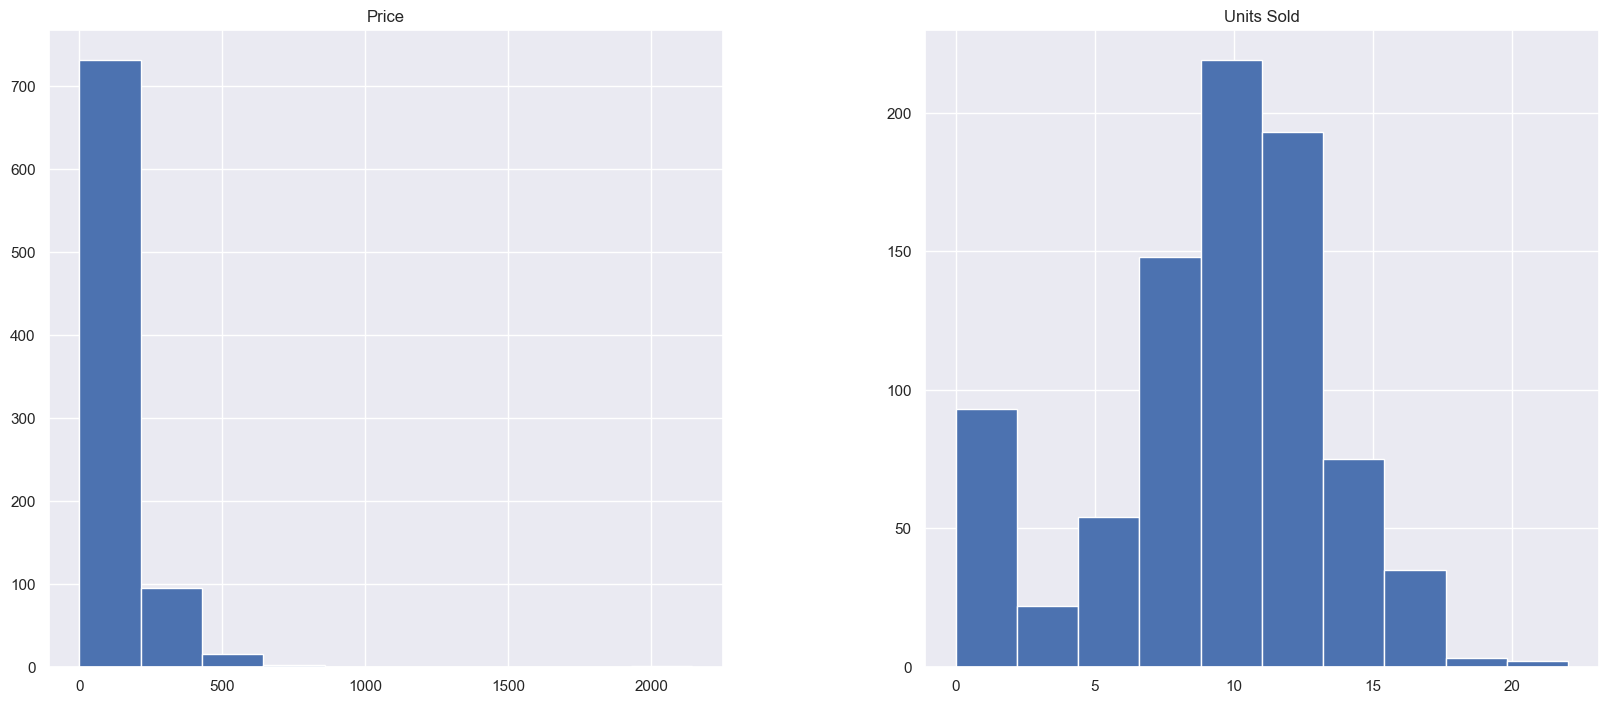

In [117]:
# plot the histogram
sales.hist()
plt.show()

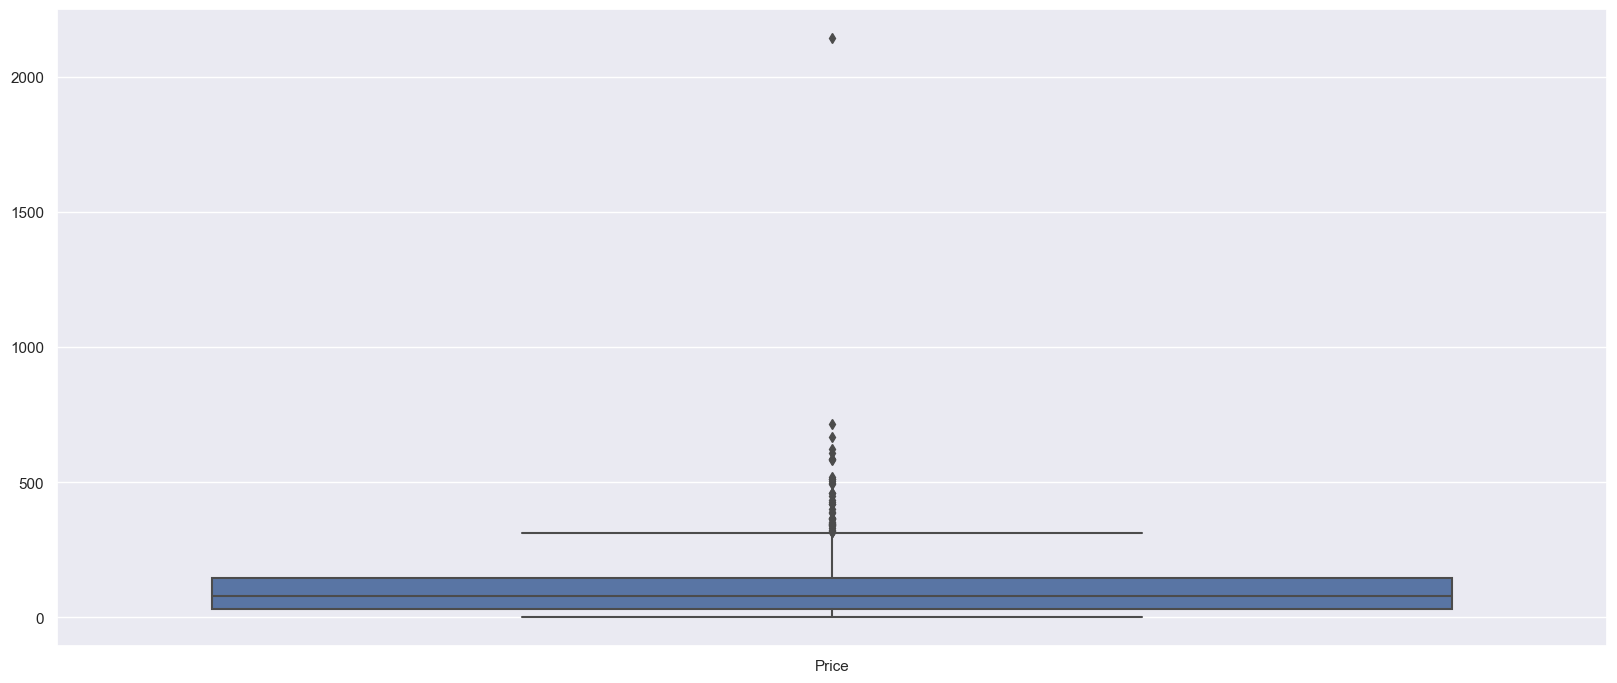

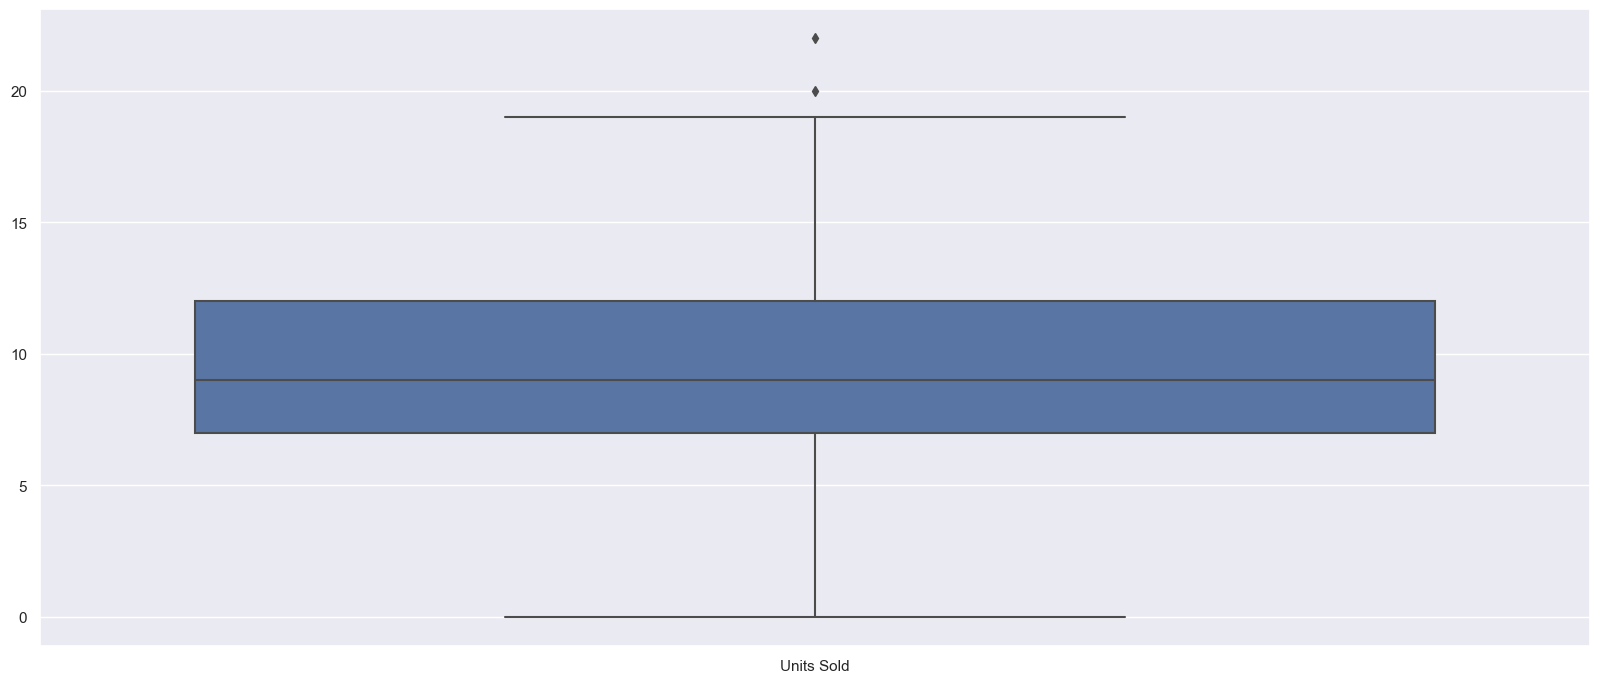

In [118]:
# plot the boxplot
sns.boxplot(sales[['Price']])
plt.show()

sns.boxplot(sales[['Units Sold']])
plt.show()


The boxplot of price indicates that an outlier exists and there are a number of entries above 75 percentile. This may due to the price varies among products and hence suggest to review the outliers by product using the threshold mean + 3 * s.d.

The box plot of Units Sold shows that the issue of outlier does not exists.  No further action is required.

In [119]:
# Create a dictionary for the threshold for considering outliver
threshold = sales.groupby("Product")["Price"].mean() + 3 * sales.groupby("Product")["Price"].std()
threshold = threshold.to_dict()
# Create a column in sales dataframe for comparison
sales["threshold"] = sales["Product"].map(threshold)
# Drop the outlier based on the threshold and remove the threshold column
sales.drop(sales[sales["Price"] > sales["threshold"]].index, inplace=True)
sales.drop("threshold", axis=1, inplace=True)

In [120]:
# Drop the duplicate value
sales.drop_duplicates(inplace=True)

In [121]:
# Revisit the cleaned data and add sales column
sales["Total Sales"] = sales["Price"]*sales["Units Sold"]
sales.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date,Total Sales
count,794,794,794.000000,794.000000,794,794.000000
unique,50,11,NaN,NaN,794,NaN
top,Product_5,Region_9,NaN,NaN,2022-01-03,NaN
freq,27,92,NaN,NaN,1,NaN
mean,NaN,NaN,101.639244,9.023929,NaN,910.427494
std,NaN,NaN,96.402122,4.259038,NaN,1043.263264
min,NaN,NaN,1.090000,0.000000,NaN,0.000000
25%,NaN,NaN,30.055000,7.000000,NaN,193.295000
50%,NaN,NaN,75.980000,9.000000,NaN,606.975000
75%,NaN,NaN,139.557500,12.000000,NaN,1291.200000


After the above steps, the missing values has been either removed or filled. The outliers and duplicates value have been removed.  The data is considered to be cleaned and can be used for additional analysis. Below are the analysis to be performed:
1. Review the Total Sales by month to identify any seasonal effects
2. Review the Total Sales by Region and by Product to identify the pattern

Since there are 50 products involved, we group the products into three categories based on their price range as below:
1. "Low" represents products with average price between 0 and 85;
2. "Medium" represents products with average price between 85 and 110;
3. "High" represents products with average price between 110 and 200.

In [122]:
# Classify the product into different price range based on their mean Price
mean_price = sales.groupby("Product", as_index=False)["Price"].mean()
bin = [0,85,110,200]
Price_range = ["Low","Medium", "High"]
mean_price["Price Range"] = pd.cut(mean_price["Price"], bin, labels=Price_range)
mean_price.drop("Price", axis=1, inplace=True)

sales = sales.merge(right=mean_price, how="left", on="Product")

#Check if the number of products under each price range is balanced.
sales.groupby("Price Range")["Product"].count()

Price Range
Low       266
Medium    227
High      291
Name: Product, dtype: int64

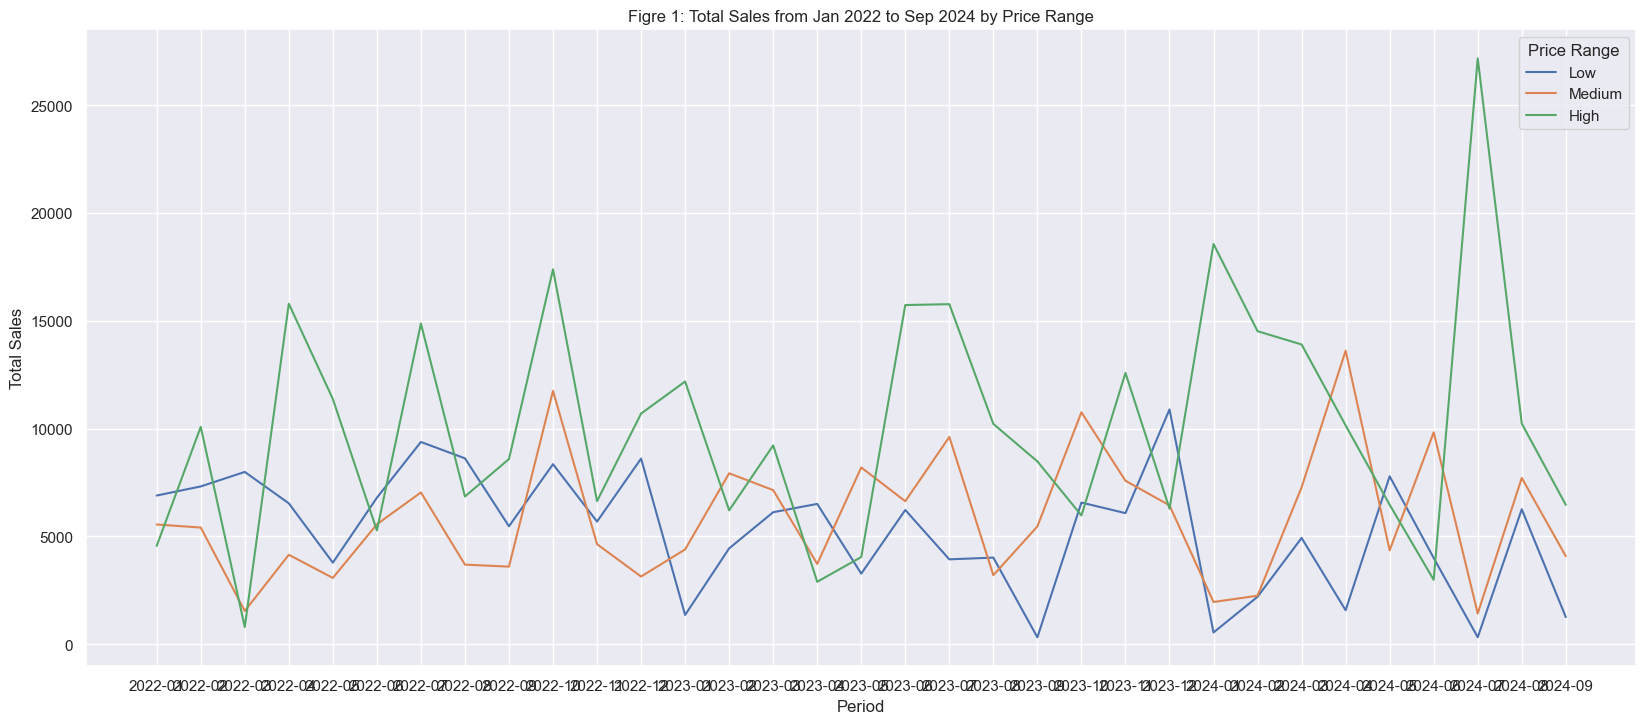

In [123]:
# Generate the lineplot to identify the time trend
sales["Sale Date"] = pd.to_datetime(sales["Sale Date"])
sales["Period"] = pd.to_datetime(sales["Sale Date"]).dt.strftime('%Y-%m')
sales["Year"] = pd.to_datetime(sales["Sale Date"]).dt.strftime('%Y')

sales_trend = sales.groupby(["Period", "Price Range"], as_index=False)["Total Sales"].sum()
sns.lineplot(data=sales_trend, x = "Period", y = "Total Sales", hue="Price Range")
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title ("Figre 1: Total Sales from Jan 2022 to Sep 2024 by Price Range")
plt.show()


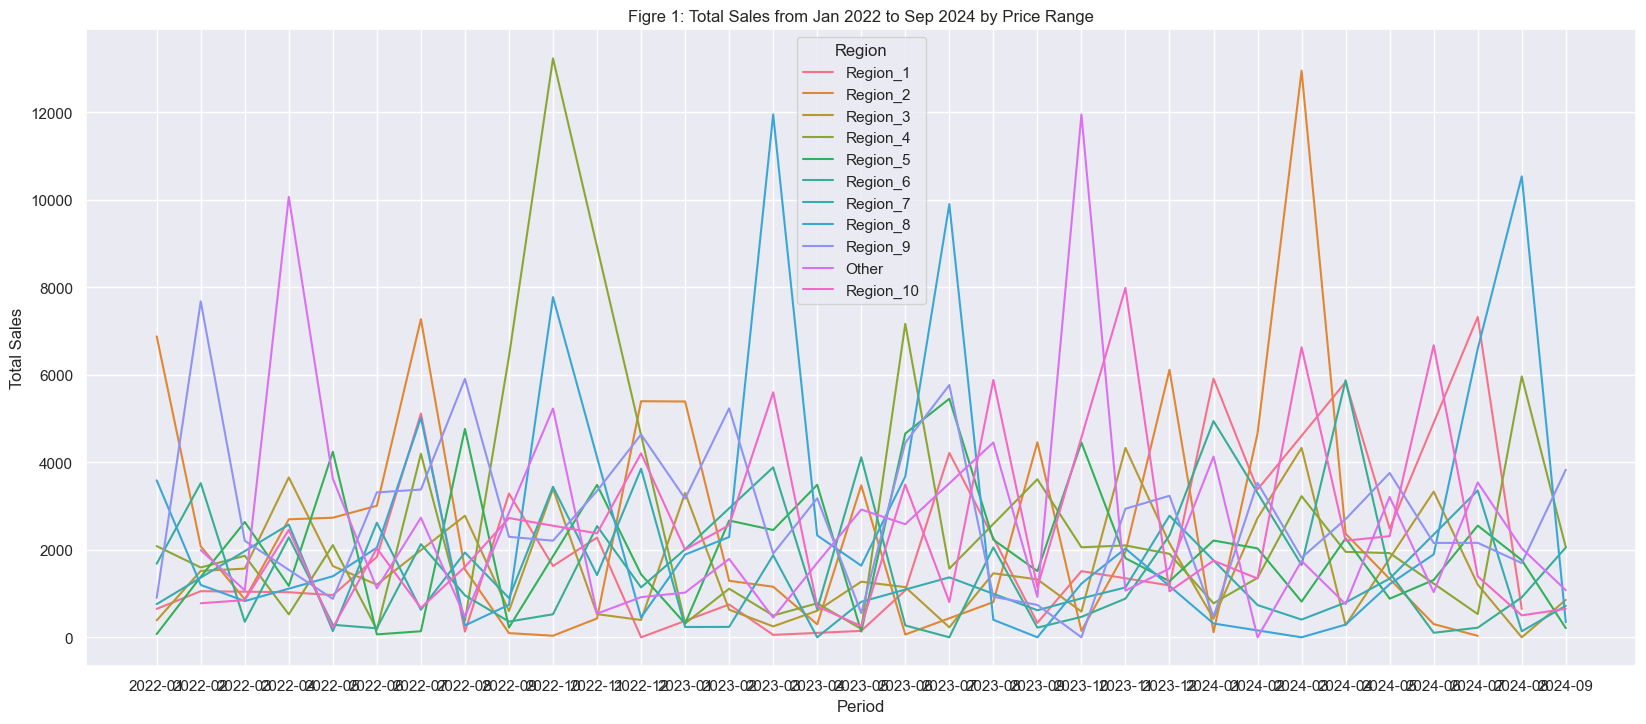

In [131]:
sales_trend = sales.groupby(["Period", "Region"], as_index=False)["Total Sales"].sum()
sns.lineplot(data=sales_trend, x = "Period", y = "Total Sales", hue="Region")
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title ("Figre 1: Total Sales from Jan 2022 to Sep 2024 by Price Range")
plt.show()

The above graph shows that the company sales is hgihly volatile throughout the year across products.  Further, the "High" price products (i.e. price range from 110 to 200) contributes most of the sales.  It is suggested to verify if the monthly volatility is driven by data quality issue or promotional campaigns of the company.

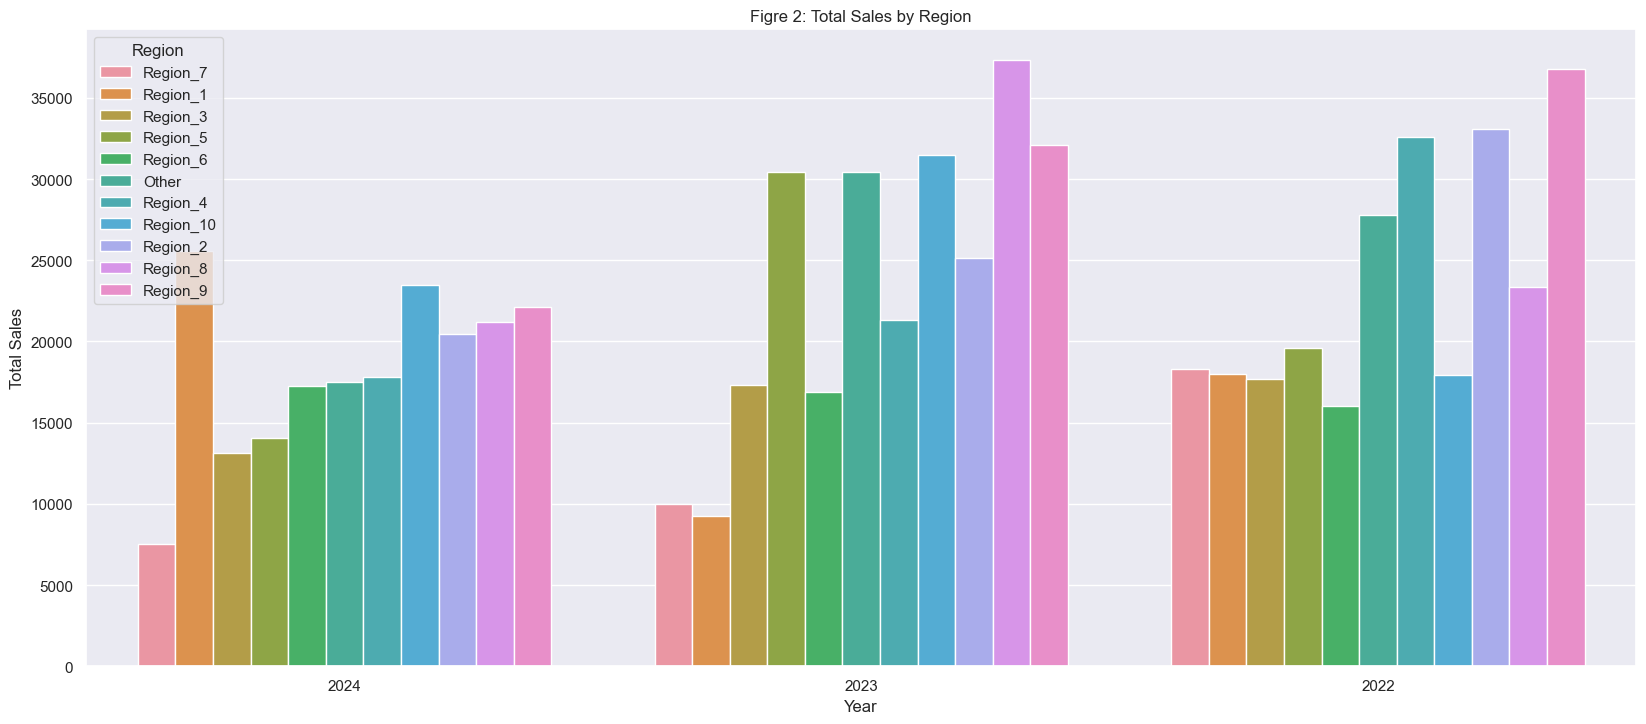

In [125]:
sales_by_region = sales.groupby(["Region","Year"], as_index=False)["Total Sales"].sum().sort_values("Total Sales")
sns.barplot(data = sales_by_region, x = "Year", y = "Total Sales", hue="Region")
plt.title ("Figre 2: Total Sales by Region")
plt.show()

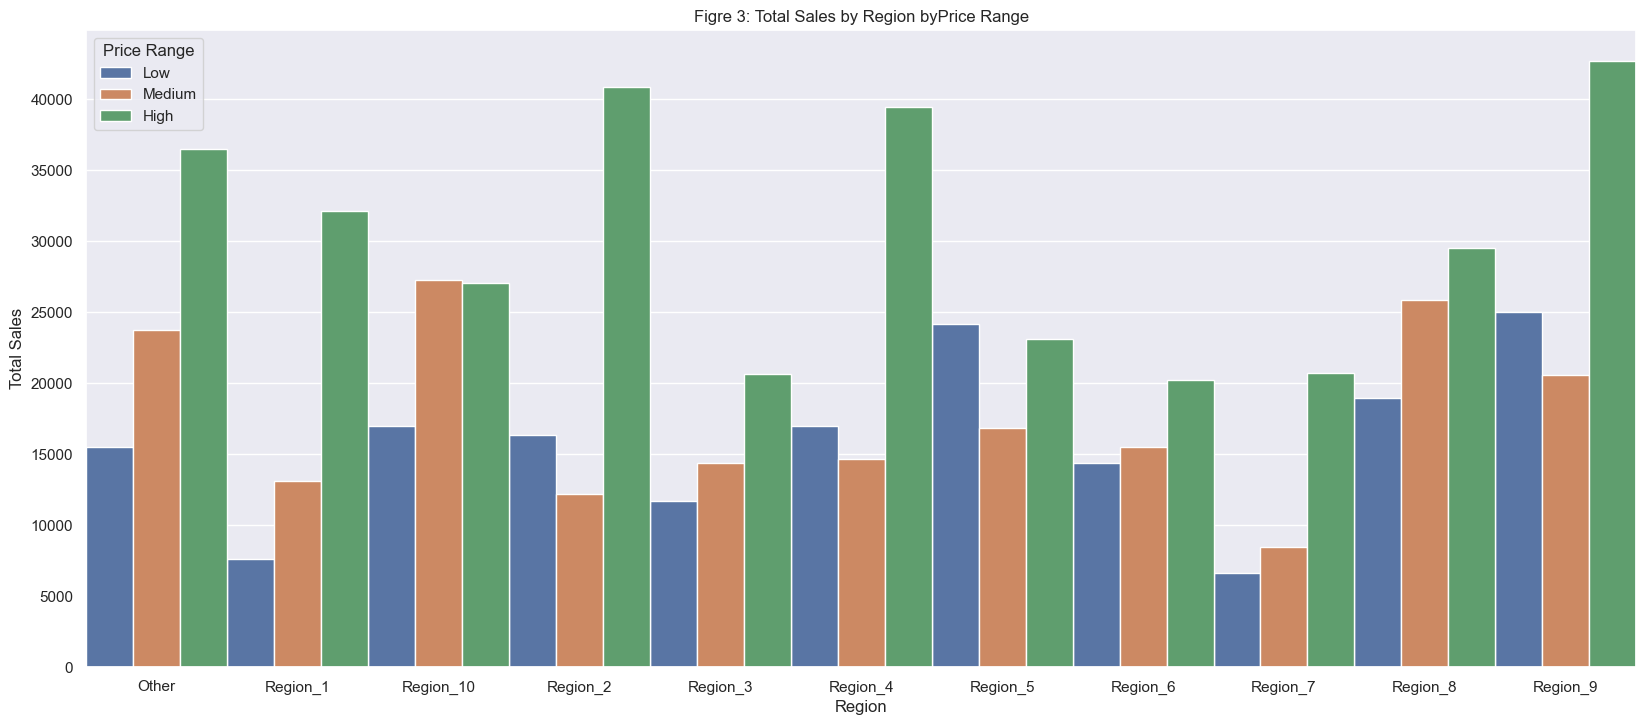

In [126]:
sales_by_region = sales.groupby(["Region","Price Range"], as_index=False)["Total Sales"].sum().sort_index()
sns.barplot(data=sales_by_region, y="Total Sales", x="Region", hue="Price Range", width = 1)
plt.title ("Figre 3: Total Sales by Region byPrice Range")
plt.show()

Region_8 and Region_9 contribute the most sales to the company while Region_7 nd Region_3 contribute the least sales which is below $50000. It is suggested to compare the demographics of these regions and see if it is driven by the demographics.

The regions with high total sales also have a larger proportion of sales under "High" price products. Hence, the total sales in region 7 and region 3 might be improved by increasing the sales effort on "High" price products.